# Southern California Dataset

[The dataset for this project can be found on Kaggle](https://www.kaggle.com/datasets/datasetengineer/southern-california-energy-consumption)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#df = pd.read_csv('drive/MyDrive/electricity_consumption_optimization_dataset.csv')

df = pd.read_csv('electricity_consumption_optimization_dataset.csv')
df

,Timestamp,Building Type,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),...,Energy Savings Target (%),Room-Level Energy Consumption (kWh),Zonal Heating/Cooling Data (kWh),Electric Vehicle Charging Status,Building Orientation,IoT Sensor Count,Thermal Comfort Index,Energy Savings Potential (%),Peak Demand Reduction Indicator,Carbon Emission Reduction Category
0,2018-01-01 00:00:00,Residential,74.679912,31.357437,62.472886,49.293544,9.892054,9.073339,0.053297,341.764320,...,16.208574,13.341547,6.719547,0,South,21.425365,80.807871,14.115263,0,Moderate Reduction
1,2018-01-01 01:00:00,Industrial,46.592761,30.229121,63.067770,65.039117,11.063696,26.487881,0.019031,427.270057,...,16.081108,11.750894,7.041203,1,South,34.385339,79.679998,4.107683,0,Moderate Reduction
2,2018-01-01 02:00:00,Commercial,58.836657,19.182581,65.030972,-16.599946,0.582297,10.385565,0.060282,278.064969,...,17.463861,24.297381,12.874189,0,North,67.588352,84.571954,4.130955,0,Moderate Reduction
3,2018-01-01 03:00:00,Residential,53.586516,16.700048,67.405643,27.398152,3.580005,8.199913,0.209318,691.906306,...,14.132527,24.586379,9.526672,0,South,37.714465,95.953736,8.681566,0,No Reduction
4,2018-01-01 04:00:00,Residential,37.800448,29.620051,55.069770,74.220380,17.823608,12.268133,0.225335,620.526286,...,20.960512,24.482306,10.039815,0,North,36.321629,68.227000,19.631869,0,Moderate Reduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,2023-12-31 20:00:00,Residential,78.697373,18.669766,76.145160,86.565125,11.475367,13.489796,0.119900,499.016888,...,18.656061,8.972060,18.585041,0,South,59.425428,70.658451,14.399685,0,Low Reduction
52581,2023-12-31 21:00:00,Residential,59.400463,24.814296,93.473230,51.380712,18.418070,25.319140,0.180057,344.329532,...,27.028035,23.793959,20.340068,0,East,50.490422,89.069748,20.619243,0,Low Reduction
52582,2023-12-31 22:00:00,Residential,65.395535,3.952222,75.281979,49.625698,17.637973,19.546613,0.168849,317.509517,...,22.125447,20.461445,7.762880,0,South,74.773075,70.760759,15.645947,0,Moderate Reduction
52583,2023-12-31 23:00:00,Residential,58.505085,12.342418,54.181047,87.792609,4.205146,-4.032314,0.139890,183.725258,...,11.750403,10.326719,-1.556912,0,South,75.925739,73.370549,11.999294,0,No Reduction


In [5]:
# Timestamp to year, month, day, hour
df = pd.read_csv('electricity_consumption_optimization_dataset.csv')

time = df["Timestamp"].str[-8:-6].astype(int)
df.insert(0, "Time", time)

day = df["Timestamp"].str[8:10].astype(int)
df.insert(0, "Date", day)

month = df["Timestamp"].str[5:7].astype(int)
df.insert(0, "Month", month)

year = df["Timestamp"].str[:4].astype(int)
df.insert(0, "Year", year)

df.drop(columns=["Timestamp"], inplace=True)

# One hot encoding
df = pd.get_dummies(df, columns=["Building Type", "Occupancy Schedule", "Building Orientation", "Carbon Emission Reduction Category"])

# Drop columns that are not predictors
df.drop(columns=["Lighting Consumption (kWh)", "HVAC Consumption (kWh)"], inplace=True)

df

,Year,Month,Date,Time,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),...,Occupancy Schedule_Occupied,Occupancy Schedule_Vacant,Building Orientation_East,Building Orientation_North,Building Orientation_South,Building Orientation_West,Carbon Emission Reduction Category_High Reduction,Carbon Emission Reduction Category_Low Reduction,Carbon Emission Reduction Category_Moderate Reduction,Carbon Emission Reduction Category_No Reduction
0,2018,1,1,0,74.679912,31.357437,62.472886,49.293544,0.053297,341.764320,...,True,False,False,False,True,False,False,False,True,False
1,2018,1,1,1,46.592761,30.229121,63.067770,65.039117,0.019031,427.270057,...,True,False,False,False,True,False,False,False,True,False
2,2018,1,1,2,58.836657,19.182581,65.030972,-16.599946,0.060282,278.064969,...,False,True,False,True,False,False,False,False,True,False
3,2018,1,1,3,53.586516,16.700048,67.405643,27.398152,0.209318,691.906306,...,True,False,False,False,True,False,False,False,False,True
4,2018,1,1,4,37.800448,29.620051,55.069770,74.220380,0.225335,620.526286,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,2023,12,31,20,78.697373,18.669766,76.145160,86.565125,0.119900,499.016888,...,True,False,False,False,True,False,False,True,False,False
52581,2023,12,31,21,59.400463,24.814296,93.473230,51.380712,0.180057,344.329532,...,False,True,True,False,False,False,False,True,False,False
52582,2023,12,31,22,65.395535,3.952222,75.281979,49.625698,0.168849,317.509517,...,True,False,False,False,True,False,False,False,True,False
52583,2023,12,31,23,58.505085,12.342418,54.181047,87.792609,0.139890,183.725258,...,False,True,False,False,True,False,False,False,False,True


In [6]:
# List features
list(df)

['Year',
 'Month',
 'Date',
 'Time',
 'Energy Consumption (kWh)',
 'Temperature (°C)',
 'Humidity (%)',
 'Occupancy Rate (%)',
 'Energy Price ($/kWh)',
 'Carbon Emission Rate (g CO2/kWh)',
 'Power Factor',
 'Voltage Levels (V)',
 'Reactive Power (kVARh)',
 'Power Outage Indicator',
 'Indoor Temperature (°C)',
 'Building Age (years)',
 'Equipment Age (years)',
 'Energy Efficiency Rating',
 'Building Size (m²)',
 'Window-to-Wall Ratio (%)',
 'Insulation Quality Score',
 'Historical Energy Consumption (kWh)',
 'Maintenance Status',
 'Demand Response Participation',
 'Local Energy Production (kWh)',
 'Grid Stability Score',
 'Solar Irradiance (W/m²)',
 'Smart Plug Usage (kWh)',
 'Water Usage (liters)',
 'Energy Savings Target (%)',
 'Room-Level Energy Consumption (kWh)',
 'Zonal Heating/Cooling Data (kWh)',
 'Electric Vehicle Charging Status',
 'IoT Sensor Count',
 'Thermal Comfort Index',
 'Energy Savings Potential (%)',
 'Peak Demand Reduction Indicator',
 'Building Type_Commercial',
 'B

# Models

## Linear Models

### Using entire dataset

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df.drop(columns=["Energy Consumption (kWh)"])
Y = df["Energy Consumption (kWh)"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

train_loss = metrics.mean_squared_error(Y_train, linear_model.predict(X_train))
test_loss = metrics.mean_squared_error(Y_test, linear_model.predict(X_test))

print("Train Loss\t", train_loss)
print("Test Loss\t", test_loss)

print(linear_model.intercept_, linear_model.coef_)

Train Loss	 409.78623903720637
Test Loss	 425.47767471613224
54.05338362773063 [-0.01195739 -0.10933404  0.06077305  0.07569327 -0.01948494 -0.04942908
 -0.06943185  0.08097055 -0.09180462 -0.05914045  0.16806439  0.00658042
 -0.00912072  0.0624655  -0.00072909 -0.00973334  0.06844623 -0.02481895
  0.01240177 -0.15373851 -0.03073764 -0.04409635 -0.02356034  0.01576314
  0.1331155  -0.05387622 -0.05122443  0.13755053  0.05629738  0.05620206
  0.03357297 -0.01128714  0.12234193 -0.1170643   0.16702276 -0.01016788
  0.05878978 -0.06784277 -0.00684364  0.00220532 -0.00220532  0.01104228
 -0.03411083  0.08331713 -0.06770869  0.04372286 -0.01159864 -0.10638218
  0.10325324]


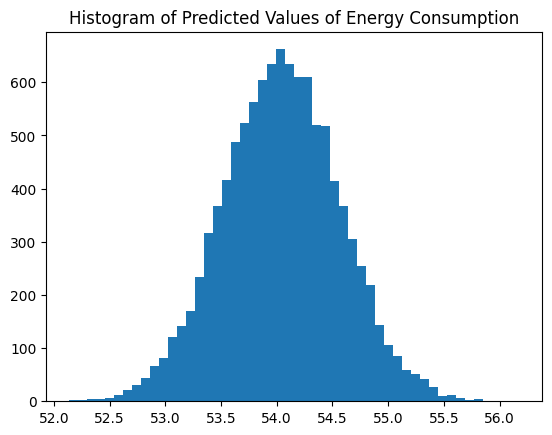

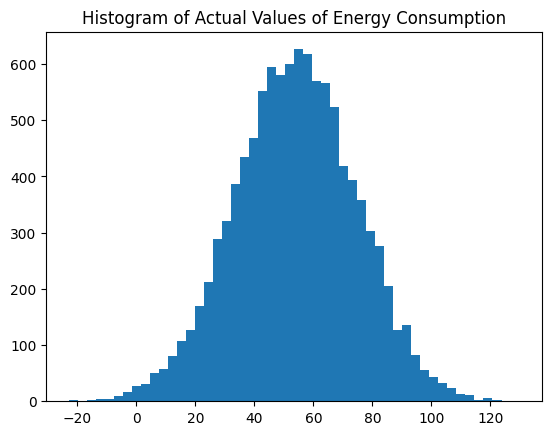

54.05338362773063


In [8]:
# Plot a histogram of predicted values
Y_pred = linear_model.predict(X_test)

plt.hist(Y_pred, bins=50)
plt.title("Histogram of Predicted Values of Energy Consumption")
plt.show()

plt.figure()
plt.hist(Y_test, bins=50)
plt.title("Histogram of Actual Values of Energy Consumption")
plt.show()

# View the mean of the output column
print(Y_train.mean())

The model is just learning the mean value and predicting near it every time.

### Using just temperature and building type

In [9]:
X = df.loc[:, ['Temperature (°C)', 'Building Type_Industrial', 'Building Type_Commercial', 'Building Type_Residential']]

Y = df["Energy Consumption (kWh)"]


# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

train_loss = metrics.mean_squared_error(Y_train, linear_model.predict(X_train))
test_loss = metrics.mean_squared_error(Y_test, linear_model.predict(X_test))

print("Train Loss\t", train_loss)
print("Test Loss\t", test_loss)

print(linear_model.intercept_, linear_model.coef_)

Train Loss	 410.05708643610876
Test Loss	 425.3253699747645
54.05338362773063 [-0.02144587 -0.06987348  0.06068117 -0.00716328]


### Using a few more columns of the dataset

In [10]:
X = df[['Temperature (°C)', 
        'Humidity (%)', 
        'Occupancy Rate (%)', 
        'Energy Price ($/kWh)', 
        'Building Type_Industrial', 
        'Building Type_Commercial', 
        'Building Type_Residential']]

Y = df["Energy Consumption (kWh)"]


# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

train_loss = metrics.mean_squared_error(Y_train, linear_model.predict(X_train))
test_loss = metrics.mean_squared_error(Y_test, linear_model.predict(X_test))

print("Train Loss\t", train_loss)
print("Test Loss\t", test_loss)

print(linear_model.intercept_, linear_model.coef_)

Train Loss	 410.04334739552064
Test Loss	 425.36006782560565
54.05338362773063 [-0.02084536 -0.05298242 -0.06628175  0.0808426  -0.06962187  0.06082059
 -0.00744954]


### Linear model with L1 Regularization

In [11]:
from sklearn.linear_model import Lasso

X = df.drop(columns=["Energy Consumption (kWh)"])
Y = df["Energy Consumption (kWh)"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)


train_loss = metrics.mean_squared_error(Y_train, lasso.predict(X_train))
test_loss = metrics.mean_squared_error(Y_test, lasso.predict(X_test))

print("Train MSE\t", train_loss)
print("Test MSE\t", test_loss)

print(lasso.intercept_, lasso.coef_)

Train MSE	 409.7903643784022
Test MSE	 425.4376675035858
54.05338362773063 [-0.00165885 -0.09928973  0.05082601  0.06592828 -0.00991143 -0.03976131
 -0.05904609  0.07108077 -0.08249421 -0.04936751  0.1585668   0.
 -0.          0.05272748 -0.         -0.          0.05844682 -0.01450957
  0.00244928 -0.14396559 -0.02105274 -0.0342586  -0.01364605  0.00556839
  0.12267775 -0.04451704 -0.04136928  0.12747794  0.04650515  0.0468278
  0.02375323 -0.00086685  0.11275363 -0.10702955  0.15713444 -0.00039965
  0.05634945 -0.05500279 -0.          0.         -0.          0.00517121
 -0.02406231  0.07931653 -0.05737213  0.04012071 -0.         -0.09131224
  0.10221856]


## Decision Tree Models

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Try some combinations of hyperparameters
for samples in [5, 10, 20, 50]:
    for depth in [20, 30, 40, None]:
        decision_tree = DecisionTreeRegressor(min_samples_leaf=samples, max_depth=depth)
        decision_tree.fit(X_train, Y_train)

        train_loss = metrics.mean_squared_error(Y_train, decision_tree.predict(X_train))
        test_loss = metrics.mean_squared_error(Y_test, decision_tree.predict(X_test))

        print("Depth=", depth, "\t Min Samples/Leaf=", samples, "\t Train: ", train_loss, "\t Test: ", test_loss)

Depth= 20 	 Min Samples/Leaf= 5 	 Train:  339.1719448024543 	 Test:  503.4694449042053
Depth= 30 	 Min Samples/Leaf= 5 	 Train:  224.99713032994896 	 Test:  619.9975479204716
Depth= 40 	 Min Samples/Leaf= 5 	 Train:  141.68046943280254 	 Test:  704.339889066359
Depth= None 	 Min Samples/Leaf= 5 	 Train:  109.54387370451657 	 Test:  739.0320530248844
Depth= 20 	 Min Samples/Leaf= 10 	 Train:  353.6051425793418 	 Test:  487.68264272566427
Depth= 30 	 Min Samples/Leaf= 10 	 Train:  270.52034211735685 	 Test:  572.0262121751084
Depth= 40 	 Min Samples/Leaf= 10 	 Train:  224.60302787000248 	 Test:  615.8683219386871
Depth= None 	 Min Samples/Leaf= 10 	 Train:  212.19859639047974 	 Test:  627.9877818739433
Depth= 20 	 Min Samples/Leaf= 20 	 Train:  367.4551278821341 	 Test:  469.95893083471685
Depth= 30 	 Min Samples/Leaf= 20 	 Train:  335.82600522197487 	 Test:  504.8258222402498
Depth= 40 	 Min Samples/Leaf= 20 	 Train:  316.7301480313041 	 Test:  524.1220595935044
Depth= None 	 Min Sample

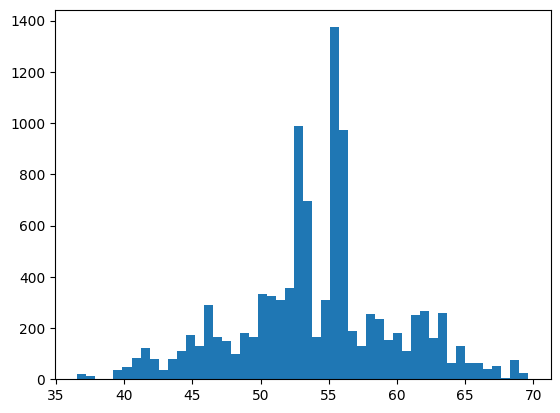

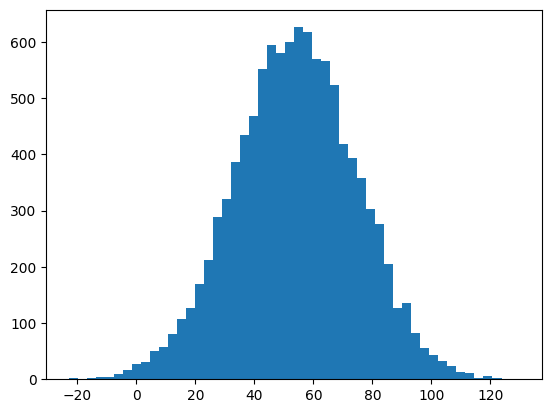

In [19]:
# Plot a histogram of predicted values for the best model
decision_tree = DecisionTreeRegressor(min_samples_leaf=50, max_depth=20)
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

plt.hist(Y_pred, bins=50)
plt.show()

plt.figure()
plt.hist(Y_test, bins=50)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor

for samples in [5, 10, 20, 50]:
    for depth in [20, 30, 40, None]:
        random_forest = RandomForestRegressor(max_depth= depth, min_samples_leaf=samples, n_jobs=-1)
        random_forest.fit(X_train, Y_train)

        train_loss = metrics.mean_squared_error(Y_train, random_forest.predict(X_train))
        test_loss = metrics.mean_squared_error(Y_test, random_forest.predict(X_test))

        print("Depth=", depth, "\t Min Samples/Leaf=", samples, "\t Train: ", train_loss, "\t Test: ", test_loss)

Depth= 20 	 Min Samples/Leaf= 5 	 Train:  274.3147372128232 	 Test:  426.7520234171841
Depth= 30 	 Min Samples/Leaf= 5 	 Train:  171.96498811959884 	 Test:  428.3075769062694
Depth= 40 	 Min Samples/Leaf= 5 	 Train:  137.4983493296689 	 Test:  428.53036405288253
Depth= None 	 Min Samples/Leaf= 5 	 Train:  130.66353703904613 	 Test:  427.38061499141156
Depth= 20 	 Min Samples/Leaf= 10 	 Train:  299.19363035471633 	 Test:  426.9395926234819
Depth= 30 	 Min Samples/Leaf= 10 	 Train:  231.25952672946642 	 Test:  427.0113373093002
Depth= 40 	 Min Samples/Leaf= 10 	 Train:  212.99143331955386 	 Test:  427.9920554205974
Depth= None 	 Min Samples/Leaf= 10 	 Train:  208.98827842117547 	 Test:  427.93375911150804
Depth= 20 	 Min Samples/Leaf= 20 	 Train:  326.4934332458834 	 Test:  426.316376014541
Depth= 30 	 Min Samples/Leaf= 20 	 Train:  293.01693967729625 	 Test:  426.5587273080785
Depth= 40 	 Min Samples/Leaf= 20 	 Train:  283.9665164768919 	 Test:  426.5807721459156
Depth= None 	 Min Sampl

### SVR Models

In [15]:
# Without PCA:
from sklearn.svm import SVR
from sklearn import metrics


svr = SVR(kernel="rbf", C=10, epsilon=5)
svr.fit(X_train, Y_train)

train_loss = metrics.mean_squared_error(Y_train, svr.predict(X_train))
test_loss = metrics.mean_squared_error(Y_test, svr.predict(X_test))

print("Train MSE\t", train_loss)
print("Test MSE\t", test_loss)

Train MSE	 335.367683276428
Test MSE	 439.36717708456547


In [21]:
from sklearn.svm import SVR
from sklearn import metrics


svr = SVR(kernel="poly", C=10, epsilon=5)
svr.fit(X_train, Y_train)

train_loss = metrics.mean_squared_error(Y_train, svr.predict(X_train))
test_loss = metrics.mean_squared_error(Y_test, svr.predict(X_test))

print("Train MSE\t", train_loss)
print("Test MSE\t", test_loss)

Train MSE	 317.644170861128
Test MSE	 475.51063018228615


In [17]:
# With PCA
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.decomposition import PCA


pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svr = SVR(kernel="rbf", C=10, epsilon=5)
svr.fit(X_train_pca, Y_train)

train_loss = metrics.mean_squared_error(Y_train, svr.predict(X_train_pca))
test_loss = metrics.mean_squared_error(Y_test, svr.predict(X_test_pca))

print("Train MSE\t", train_loss)
print("Test MSE\t", test_loss)

Train MSE	 409.39272234408617
Test MSE	 425.8007545017377


The cell below uses an neural net regressor to see if there are more complex patterns in the dataset

In [22]:
from sklearn.neural_network import MLPRegressor
# Add categorical feature
X = df[['Temperature (°C)', 
        'Humidity (%)', 
        'Occupancy Rate (%)', 
        'Energy Price ($/kWh)', 
        'Building Type_Industrial', 
        'Building Type_Commercial', 
        'Building Type_Residential']]
#X = pd.get_dummies(X, columns=['Building Type'])

# Proceed as before...
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                   max_iter=2000, random_state=42, alpha=0.01, learning_rate_init=0.001)
mlp.fit(X_train, Y_train)

train_pred = mlp.predict(X_train)
test_pred = mlp.predict(X_test)

train_loss = metrics.mean_squared_error(Y_train, train_pred)
test_loss = metrics.mean_squared_error(Y_test, test_pred)

print("Train MSE:\t", train_loss)
print("Test MSE:\t", test_loss)

Train MSE:	 410.2504293289777
Test MSE:	 428.17583023158164


# Dataset Visualization

Since we are not finding any usable results, we will try to visualize the data to see if there are any patterns that may help

<Axes: >

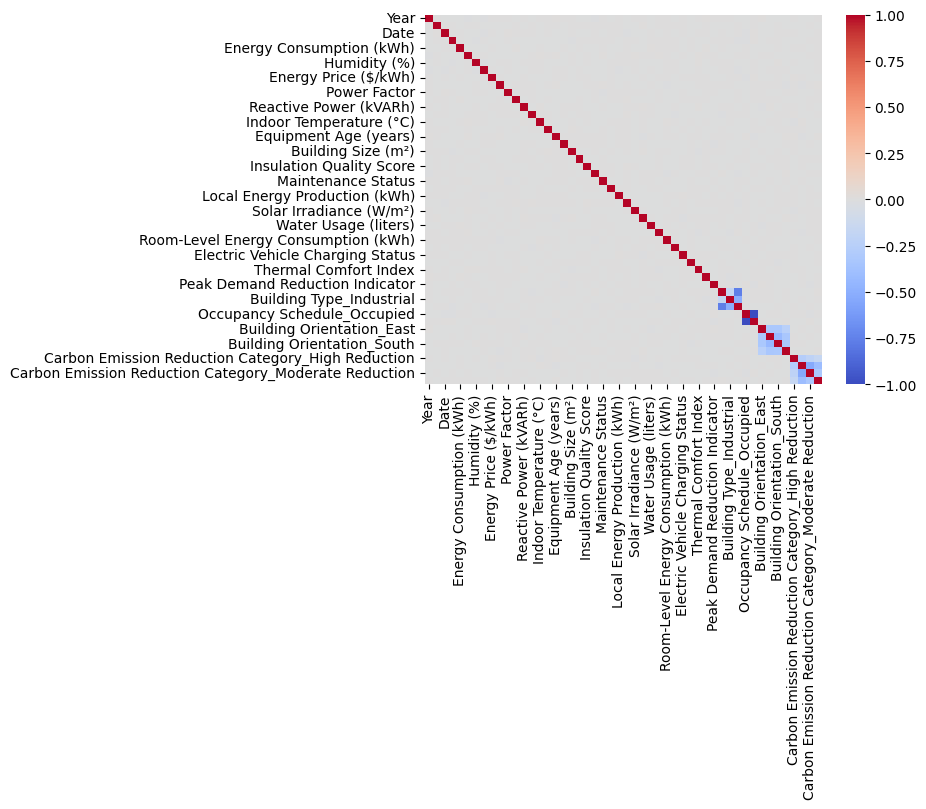

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1)

Text(0, 0.5, 'Energy Consumption (kWh)')

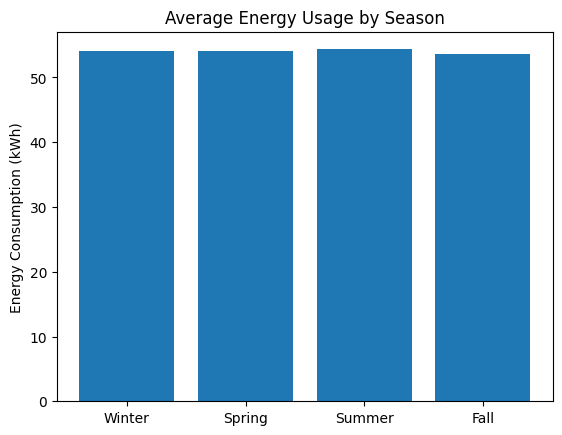

In [6]:
# Average by season
seasons = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]

averages = []

for s in seasons:
    avg = df.loc[df["Month"].isin(s), "Energy Consumption (kWh)"].mean()
    averages.append(avg)

plt.bar(["Winter", "Spring", "Summer", "Fall"], averages)
plt.title("Average Energy Usage by Season")
plt.ylabel("Energy Consumption (kWh)")

Text(0, 0.5, 'Energy Consumption (kWh)')

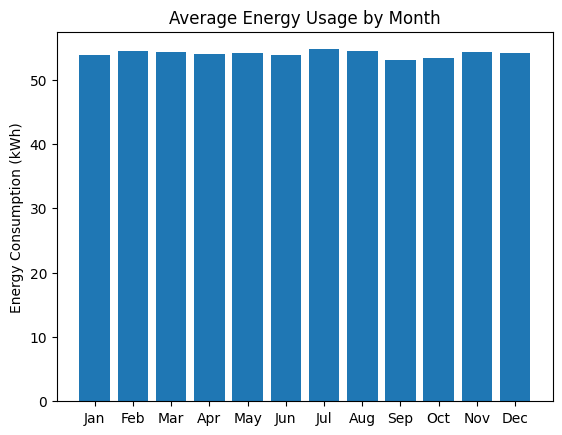

In [7]:
# Average by month

averages = []

for month in range(1,13):
    avg = df.loc[df["Month"] == month, "Energy Consumption (kWh)"].mean()
    averages.append(avg)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, averages)
plt.title("Average Energy Usage by Month")
plt.ylabel("Energy Consumption (kWh)")

Just looking at residential buildings:

Text(0, 0.5, 'Energy Consumption (kWh)')

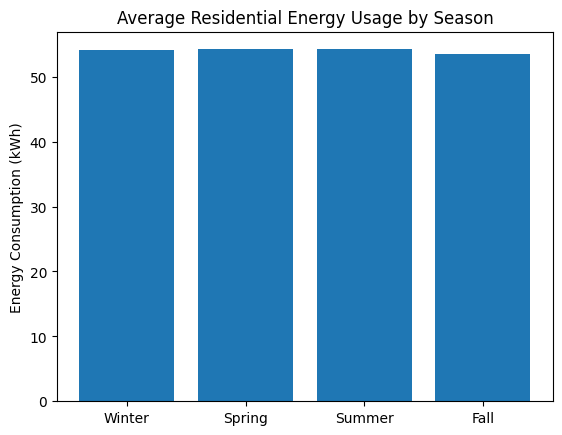

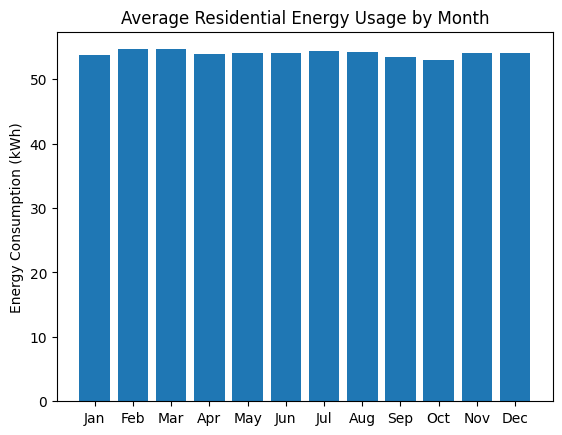

In [8]:
df_residential = df[df["Building Type_Residential"]]

# Average by season
seasons = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]

averages = []

for s in seasons:
    avg = df_residential.loc[df_residential["Month"].isin(s), "Energy Consumption (kWh)"].mean()
    averages.append(avg)

plt.bar(["Winter", "Spring", "Summer", "Fall"], averages)
plt.title("Average Residential Energy Usage by Season")
plt.ylabel("Energy Consumption (kWh)")

# Average by month

averages = []

for month in range(1,13):
    avg = df_residential.loc[df_residential["Month"] == month, "Energy Consumption (kWh)"].mean()
    averages.append(avg)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure()
plt.bar(months, averages)
plt.title("Average Residential Energy Usage by Month")
plt.ylabel("Energy Consumption (kWh)")

Text(0, 0.5, 'Energy Consumption (kWh)')

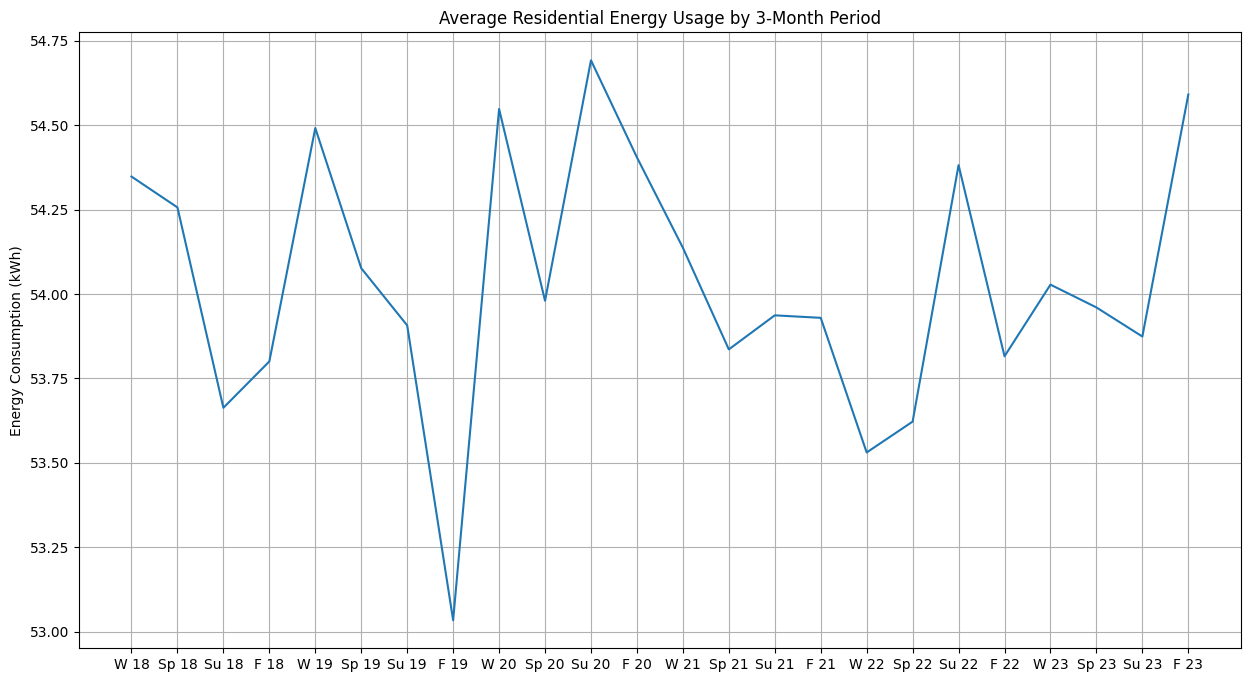

In [9]:
# Average by season
seasons = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
season_names = ["W", "Sp", "Su", "F"]

averages = []
labels = []
for y in pd.unique(df["Year"]):
    subset = df[df["Year"] == y]
    for s, n in zip(seasons, season_names):
        if (y == 2024):
            break
        avg = subset.loc[subset["Month"].isin(s), "Energy Consumption (kWh)"].mean()
        averages.append(avg)
        labels.append(n + " " + str(y % 100))

plt.figure(figsize=(15,8)) 
plt.plot(labels, averages)
plt.grid(visible=True)
plt.title("Average Residential Energy Usage by 3-Month Period")
plt.ylabel("Energy Consumption (kWh)")

Text(0, 0.5, 'Temperature (°C)')

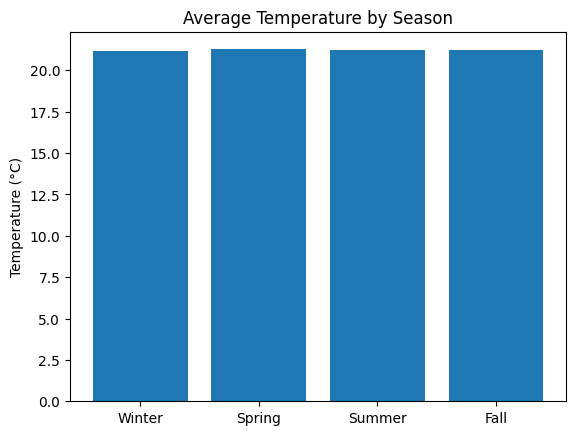

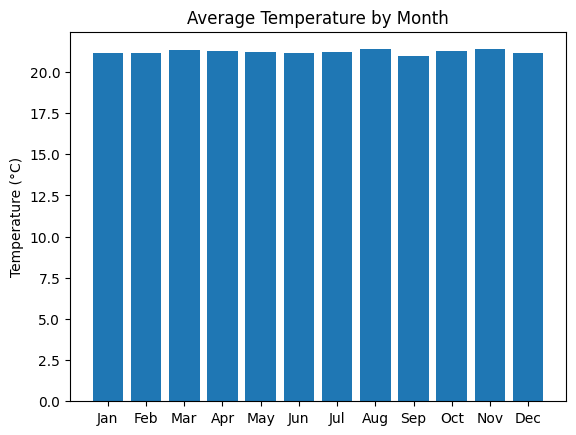

In [10]:
# Average temperature by season
seasons = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]

averages = []

for s in seasons:
    avg = df.loc[df["Month"].isin(s), "Temperature (°C)"].mean()
    averages.append(avg)

plt.bar(["Winter", "Spring", "Summer", "Fall"], averages)
plt.title("Average Temperature by Season")
plt.ylabel("Temperature (°C)")

averages = []
for month in range(1,13):
    avg = df.loc[df["Month"] == month, "Temperature (°C)"].mean()
    averages.append(avg)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure()
plt.bar(months, averages)
plt.title("Average Temperature by Month")
plt.ylabel("Temperature (°C)")

Text(0, 0.5, 'Temperature (°C)')

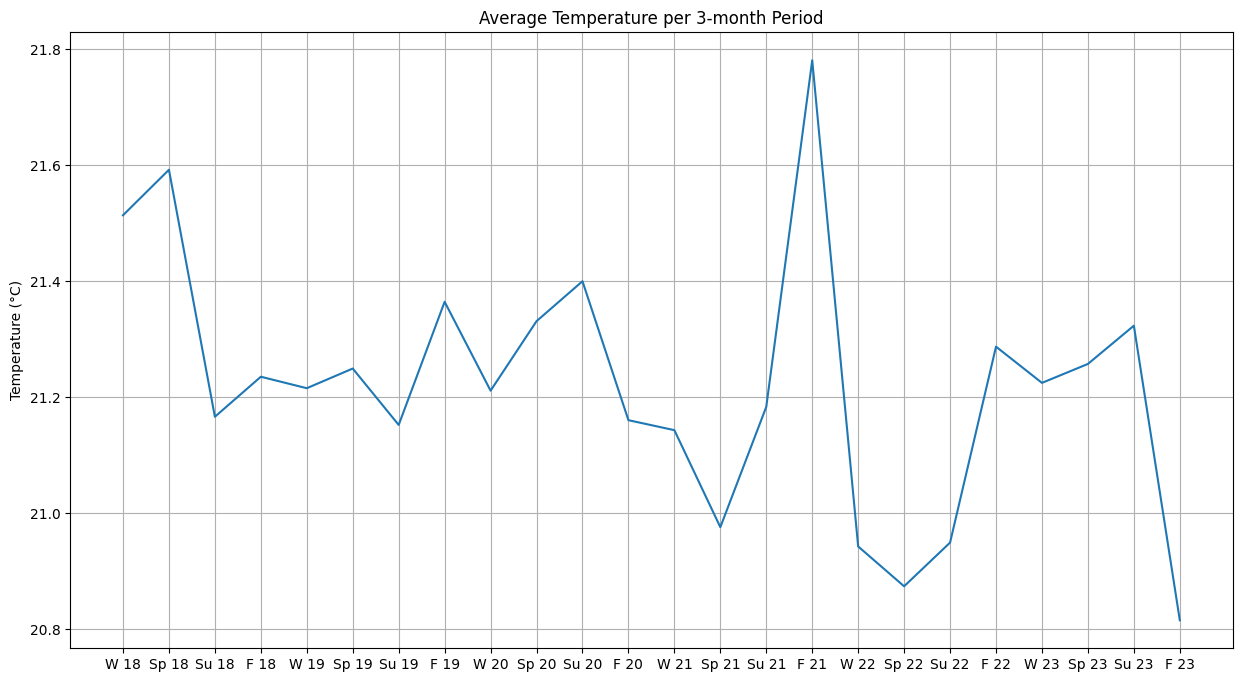

In [11]:
# Average temperature by season
seasons = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
season_names = ["W", "Sp", "Su", "F"]

averages = []
labels = []
for y in pd.unique(df["Year"]):
    subset = df[df["Year"] == y]
    for s, n in zip(seasons, season_names):
        if (y == 2024):
            break
        avg = subset.loc[subset["Month"].isin(s), "Temperature (°C)"].mean()
        averages.append(avg)
        labels.append(n + " " + str(y % 100))

plt.figure(figsize=(15,8)) 
plt.plot(labels, averages)
plt.grid(visible=True)
plt.title("Average Temperature per 3-month Period")
plt.ylabel("Temperature (°C)")